# California Housing Dataset
##### Author: Chenyang Skylar Li

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CSkylarL/DataScience-MachineLearning/blob/main/data/california_housing/california_housing.ipynb)

# Table of Contents
1. [Introduction](#introduction)
2. [Load data](#load-data)
3. [Data information](#data-information)
4. [Data statistic description](#data-statistic-description)
5. [Data target distribution](#data-target-distribution)
6. [Data visualization](#data-visualization)

## Introduction


The [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)) is a popular dataset used in Machine Learning for regression tasks. It consists of data derived from the 1990 U.S. Census, providing housing information in the state of California.

This dataset contains 20640 instances, each representing a district in California. For each district, the dataset includes the following features:

1. `MedInc`: Median income in block
2. `HouseAge`: Median house age in block
3. `AveRooms`: Average number of rooms
4. `AveBedrms`: Average number of bedrooms
5. `Population`: Block population
6. `AveOccup`: Average house occupancy
7. `Latitude`: House block latitude
8. `Longitude`: House block longitude

The target variable is the `median house value` for California districts.

The California Housing dataset is often used for exploring various regression models, including linear regression, decision tree regression, and ensemble methods. It is also useful for demonstrating data preprocessing techniques, such as feature scaling and handling missing values.



## Load data

[fetch_california_housing()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing) function from the scikit-learn library is used to load the dataset. It has the following characteristics:

Each instance in the dataset represents a district in California. The target variable is the median house value for California districts.


In [9]:
from sklearn.datasets import fetch_california_housing
# Load the dataset
data = fetch_california_housing()

# Display the shape of the data, target, and number of classes
print("Data shape:", data.data.shape)
print("Target shape:", data.target.shape)
print("Number of classes:", len(data.target_names))
print("Classes:", data.target_names)

Data shape: (20640, 8)
Target shape: (20640,)
Number of classes: 1
Classes: ['MedHouseVal']


I also combined the data and target into a DataFrame and saved the data to [california_housing.csv](./california_housing.csv) file in the same directory as this notebook, so that you can load the data from the numpy files directly.

    ```python
    import pandas as pd

    # Combine the data and target into a DataFrame
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target

    # Save the DataFrame to a .csv file
    df.to_csv('california_housing.csv', index=False)
    ```
    
You can load the data using below code:

In [10]:
import pandas as pd

# Read the .csv file back into a DataFrame
df = pd.read_csv('california_housing.csv')

# Display the first few rows of the DataFrame
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Data information

Here is brief information about the dataset:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Data statistic description

Here is the statistic description of the dataset:

In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Data target distribution

Here is the target distribution of the dataset:

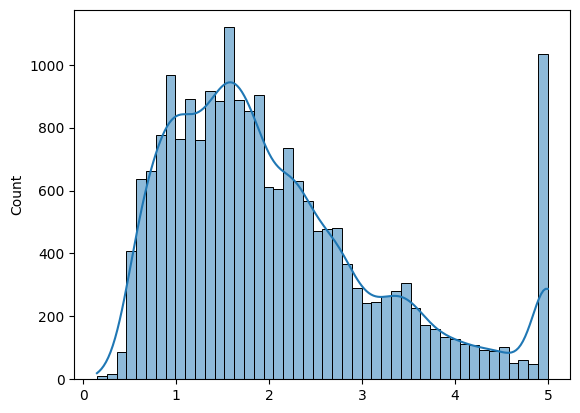

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the distribution of the target variable using a histogram:
sns.histplot(data.target, kde=True)
plt.show()

## Data Visualization

Here we simply visualize the dataset as the map of California:

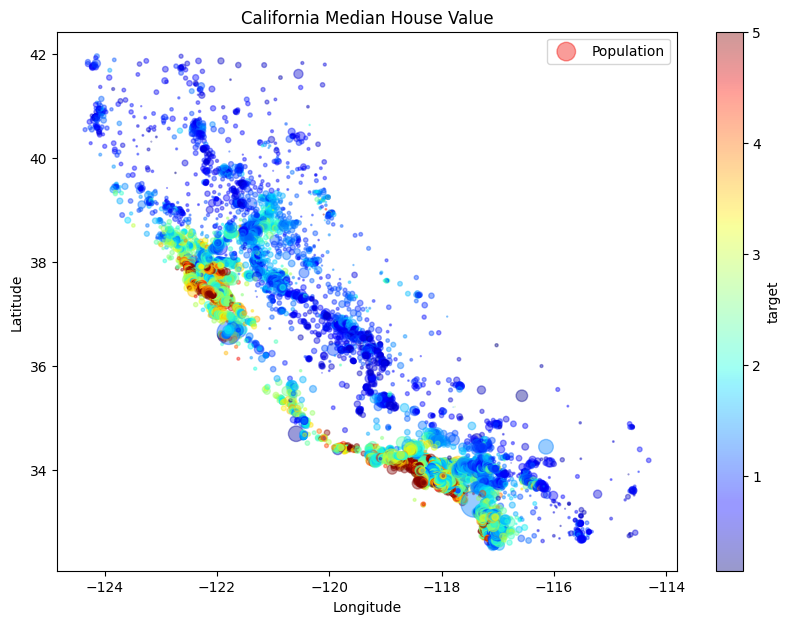

In [14]:
# Visualize the california housing map

df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             s=df["Population"]/100, label="Population", figsize=(10,7),
             c="target", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.title("California Median House Value")
plt.show()